R2   === > 0.8867729689626132
RMSE === > 581


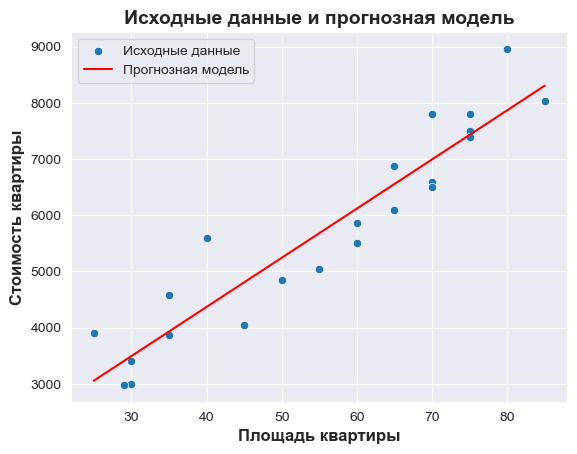

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
import torch

df = pd.DataFrame({
    'cost': [3000, 2980, 5600, 7800, 6090, 3870, 8960, 6590, 7500, 5040,
             4050, 8040, 4850, 5870, 6870, 3400, 5500, 7800, 3900, 4580,
             7400, 6500],
    'square': [30, 29, 40, 70, 65, 35, 80, 70, 75, 55, 45, 85, 50, 60,
               65, 30, 60, 75, 25, 35, 75, 70]
})

# Определяем признаки и целевую переменную
target = df['cost']
features=df['square']
features = np.array(features).reshape(-1, 1)

# Обучаем модель
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)

# Выводим метрики
print('R2   === >', r2_score(target, predictions))  # Коэффициент детерминации
print('RMSE === >', int(sqrt(mean_squared_error(target, predictions))))  # Корень средней квадратичной ошибки

# Построение графика
sns.scatterplot(data=df, x='square', y='cost', label="Исходные данные")
sns.lineplot(x=df['square'], y=predictions, color="r", label="Прогнозная модель")
plt.title('Исходные данные и прогнозная модель', fontsize=14, weight='bold')
plt.ylabel("Стоимость квартиры", fontsize=12, weight='bold')
plt.xlabel("Площадь квартиры", fontsize=12, weight='bold')
plt.legend()
plt.show()


In [24]:
df = pd.DataFrame(
    {'cost': [3,2.98,5.6,7.800,6.090,3.870,8.960,6.590,7.500,5.040,4.050,8.040,4.850,5.870,6.870,3.400,5.500,7.800,3.900,4.580,7.400,6.500],
     'square': [30,29,40,70,65,35,80,70,75,55,45,85,50,60,65,30,60,75,25,35,75,70]
    })


target = torch.FloatTensor(df['cost']).reshape(-1,1)
features = torch.FloatTensor(df['square']).reshape(-1,1)

In [25]:
w = torch.tensor(0.0984)
b = torch.tensor(0.0016)

In [26]:
def fa_liner(x):
    return x #[w*x[i] + b for i in range(len(x))]

In [27]:
y_1 = features * w + b  # результат после входного слоя
y_pred = fa_liner(y_1) # применяется функция активации

In [28]:
print('R2    === > ', r2_score(target.detach().numpy(), y_pred.detach().numpy()))
print('RMSE   === > ',sqrt(mean_squared_error(target.detach().numpy(), y_pred.detach().numpy())))

R2    === >  0.8504393100738525
RMSE   === >  0.66861392535218


/tmp/ipykernel_87240/1369490913.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(features, target, 'go', color="b") # исходные данные


Text(0.5, 0, 'Площадь квартиры')

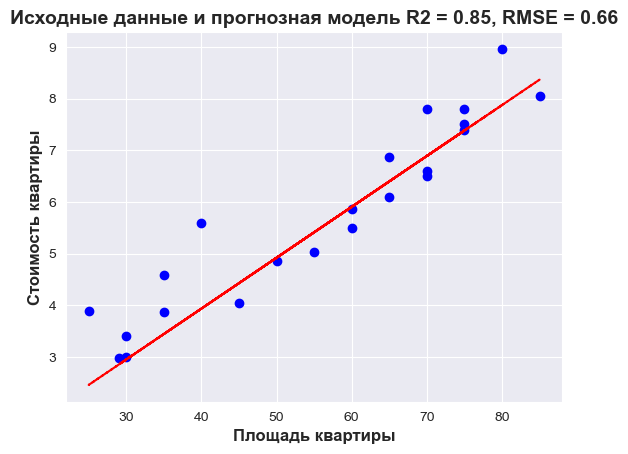

In [29]:
plt.plot(features, target, 'go', color="b") # исходные данные
plt.plot(features, y_pred.detach().numpy(), '--', color="r") # предсказания
plt.title('Исходные данные и прогнозная модель R2 = 0.85, RMSE = 0.66', fontsize=14, weight='bold')
plt.ylabel("Стоимость квартиры", fontsize=12, weight='bold')
plt.xlabel("Площадь квартиры", fontsize=12, weight='bold')
